#데이터 재구조화(reshaping)
>분석 과정에서 원본 데이터 구조가 분석하고자 하는 방향과 맞지 않아 구조를 변경하는 작업을 재구조화라고 한다.

> 재구조화 함수는 다음과 같이 사용된다.
* 데이터 구간화 : 데이터의 구간을 동일한 길이로 구분(pd.cut)하거나 동일한 개수(pd.qcut)로 구분하는 방법
* 원-핫인코딩 : 구조를 행열 형태로 변경하여 데이터가 존재하는 곳에만 1로 표시하는 방법
* 데이터 전치 : 행과 열을 변경하는 방법
* 피봇 테이블 : 전체 데이터에서 필요한 부분을 분리하여 별도의 테이블을 생성하는 방법
* 열, 행 전환 : 열을 행으로 변환하는 방법
* 행, 열 인덱스 전환 : 행과 열을 교환할 경우 사용하는 방법

> 여기서는 데이터 구조화와 원-핫인코딩 2가지에 대해서만 알아보자

##1. 데이터 구간화
###1.1 간단한 사용법 익히기
>연속된 데이터를 특정 구간으로 나누어 처리하는 방법으로 간단하게 각 함수별 사용법을 알아보자

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/4. 머신러닝/1. 분석 기초/2. 데이터 분석을 위한 기초 통계 수학/2. 데이터 탐색/Data/exam_sample.csv')
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [3]:
df_cut_math = pd.cut(df['math'], 3)
df_cut_math

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64, right]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

>cut 함수는 구간을 나누는 함수로써 위의 코드에서는 math를 기준으로 3구간으로 나누게 된다. 첫 번째 구간은 19.93 ~ 43.333으로 3, 8이 이 구간에 속하며 두 번째 구간은 43.333 ~ 66.667로 0, 1, 2, 5, 9가 이 구간에 속한다. 마지막 구간은 66.667 ~ 90.0으로 4, 6, 7이 이 구간에 속한다. 이렇게 전체 범위를 구간으로 나누어 처리하는 함수가 cut이다.

In [4]:
df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


>위에서 나눈 구간별로 그룹화시키기 위해 groupby를 지정했고 통계 정보를 얻기 위해 agg를 이용했다. 표준편차가 적은 것으로 판단하기에 각 그룹별로 고르게 분포되어 있은 것(평균 중심으로 모여있다)을 알 수 있다.

In [5]:
df_cut_math = pd.cut(df['math'], 3, labels=['C학점', 'B학점', 'A학점'])
print(df_cut_math)

df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.agg(['count', 'mean', 'std', 'min', 'max'])

0    B학점
1    B학점
2    B학점
3    C학점
4    A학점
5    B학점
6    A학점
7    A학점
8    C학점
9    B학점
Name: math, dtype: category
Categories (3, object): ['C학점' < 'B학점' < 'A학점']


,count,mean,std,min,max
math,,,,,
C학점,2,25.000000,7.071068,20,30
B학점,5,51.000000,5.477226,45,60
A학점,3,86.666667,5.773503,80,90


>label을 이용하면 범위가 아닌 이름을 지정할 수 있다.cut 함수에서 label을 지정하면 label의 첫 번째 값이 가장 작은 값으로 표현된다.

In [6]:
df_qcut_english = pd.qcut(df['english'], 3, labels=False)
df_qcut_english

0    2
1    1
2    0
3    2
4    0
5    0
6    1
7    0
8    2
9    1
Name: english, dtype: int64

>qcut 함수는 범위의 기준을 개수로 지정한다. labels의 값이 FALSE이면 0부터 시작하는 순차적인 값이 나타나게 되며 3을 입력했음으로 0~2까지의 값이 나타나게 된다.

In [7]:
df_qcut_english_group = df['english'].groupby(df_qcut_english)
df_qcut_english_group.agg(['count', 'mean', 'std', 'min','max'])

,count,mean,std,min,max
english,,,,,
0,4,83.250000,5.123475,78,89
1,3,93.333333,3.511885,90,97
2,3,98.000000,0.000000,98,98


>위처럼 실행 결과 대략 3개씩 고르게 분포되어 있는 것을 볼 수 있다.

###1.2 구간화 목적
>구간화를 이용하면 다음과 같은 문제를 해결할 수 있다.
1. 이상치로 발생 가능한 문제를 완화 시켜줄 수 있다.
2. 결측치 처리를 보다 간편하게 처리할 수 있다.


####1.2.1 이상치 완화

In [8]:
df_student_height=pd.DataFrame([155,167,169,170,171,178,177,172,300], columns=['height'])
print(df_student_height)
df_student_height.describe()


   height
0     155
1     167
2     169
3     170
4     171
5     178
6     177
7     172
8     300


,height
count,9.000000
mean,184.333333
std,43.880520
min,155.000000
25%,169.000000
50%,171.000000
75%,177.000000
max,300.000000


>위의 데이터에서 마지막 데이터가 이상치로 나타났다.통계정보를 확인하기 위해 describe함수를 사용했다. 
* 평균 184, 표준편차 43, 중위수 171

>표준편차가 큰 것으로 보아 평균 주위에 데이터가 별로 없다고 판단할 수 있으며 이를 대표값으로 사용할 수 없다. 따라서 중위수를 대표값으로 처리해야 한다. 

>이러한 현상이 일어나는 것은 이상치로 인해 평균의 의미가 퇴색되어 져서 그렇다.


In [9]:
df_student_height_cut = pd.cut(df_student_height['height'], [150,160,170,180, 190, 210])
print(df_student_height_cut)
df_student_height_group = df_student_height.groupby(df_student_height_cut)
df_student_height_group.agg(['count', 'mean', 'std', 'min', 'max'])

0    (150.0, 160.0]
1    (160.0, 170.0]
2    (160.0, 170.0]
3    (160.0, 170.0]
4    (170.0, 180.0]
5    (170.0, 180.0]
6    (170.0, 180.0]
7    (170.0, 180.0]
8               NaN
Name: height, dtype: category
Categories (5, interval[int64, right]): [(150, 160] < (160, 170] < (170, 180] < (180, 190] <
                                         (190, 210]]


height                                    
            count        mean       std    min    max
height                                               
(150, 160]      1  155.000000       NaN  155.0  155.0
(160, 170]      3  168.666667  1.527525  167.0  170.0
(170, 180]      4  174.500000  3.511885  171.0  178.0
(180, 190]      0         NaN       NaN    NaN    NaN
(190, 210]      0         NaN       NaN    NaN    NaN

>위처럼 범위를 리스트로 지정하면 범위를 벗어난 데이터를 처리되지 않는 것을 볼 수 있다. 이를 이용하여 이상치를 완화 시킬 수 있다.

####1.2.2 결측치 처리

In [10]:
import numpy as np

df_student_height=pd.DataFrame([155,167,169,170,171,178,177,np.nan,172,300], columns=['height'])
print(df_student_height)
df_student_height.describe()


   height
0   155.0
1   167.0
2   169.0
3   170.0
4   171.0
5   178.0
6   177.0
7     NaN
8   172.0
9   300.0


,height
count,9.000000
mean,184.333333
std,43.880520
min,155.000000
25%,169.000000
50%,171.000000
75%,177.000000
max,300.000000


>중간 데이터에 임의로 결측치를 추가했다.

In [11]:
df_student_height_cut = pd.cut(df_student_height['height'], [150,160,170,180, 190, 210])
print(df_student_height_cut)
df_student_height_group = df_student_height.groupby(df_student_height_cut)
df_student_height_group.agg(['count', 'mean', 'std', 'min', 'max'])

0    (150.0, 160.0]
1    (160.0, 170.0]
2    (160.0, 170.0]
3    (160.0, 170.0]
4    (170.0, 180.0]
5    (170.0, 180.0]
6    (170.0, 180.0]
7               NaN
8    (170.0, 180.0]
9               NaN
Name: height, dtype: category
Categories (5, interval[int64, right]): [(150, 160] < (160, 170] < (170, 180] < (180, 190] <
                                         (190, 210]]


height                                    
            count        mean       std    min    max
height                                               
(150, 160]      1  155.000000       NaN  155.0  155.0
(160, 170]      3  168.666667  1.527525  167.0  170.0
(170, 180]      4  174.500000  3.511885  171.0  178.0
(180, 190]      0         NaN       NaN    NaN    NaN
(190, 210]      0         NaN       NaN    NaN    NaN

>결측치는 값이 없는 것이므로 위의 범위에 포함되지 않기 때문에 자연스럽게 제거할 수 있다.

>이렇듯 구간화를 이용하여 이상치 및 결측치를 제거할 수 있다.

>

##2. 원-핫인코딩
>원-핫 인코딩은 사람이 이해하는 언어를 컴퓨터가 쉽게 이해할 수 있도록 행렬로 표현하고 단어가 존재하는 곳은 1로 아닌 곳은 0으로 표현한다. 주로 단어 처리를 위해 사용되는 기술로 추후 추천 알고리즘이나 자연어 처리 부분에서 활용하게 될 것이다.

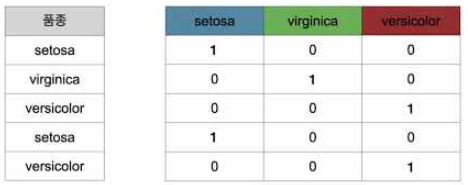

>위의 그림은 총 3가지 품종으로 표현되어 column을 설정하고 각 row와 연계되는 column 정보를 1로 설정한 예제이다.

In [ ]:
print(df.dtypes)
df_dummies = pd.get_dummies(df)
df_dummies

student_no     int64
class         object
science        int64
english        int64
math           int64
sex           object
dtype: object


,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


>위에서 보듯이 type이 object인 정보를 행렬로 표현하여 존재하는 부분을 1로 표시하였다. 자세한 활용법은 추후 알아보자